In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('../input/spotify-12m-songs/tracks_features.csv')

In [3]:
data.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

In [5]:
data.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06
mean,7.656352e+00,1.055906e+00,4.930565e-01,5.095363e-01,5.194151e+00,-1.180870e+01,6.714595e-01,8.438219e-02,4.467511e-01,2.828605e-01,2.015994e-01,4.279866e-01,1.176344e+02,2.488399e+05,3.832494e+00,2.007328e+03
std,5.994977e+00,2.953752e-01,1.896694e-01,2.946839e-01,3.536731e+00,6.982132e+00,4.696827e-01,1.159914e-01,3.852014e-01,3.762844e-01,1.804591e-01,2.704846e-01,3.093705e+01,1.622104e+05,5.611826e-01,1.210117e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740900e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243390e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


In [6]:
data[data['year']==0]

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
815351,035h5flqzwF6I5CTfsdHPA,Jimmy Neutron,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],1,1,False,0.795,0.562,2,-11.327,1,0.0519,0.01560,0.439,0.0860,0.389,109.985,183000,4.0,0,0000
815352,49x05fLGDKCsCUA7CG0VpY,I Luv You,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],2,1,False,0.762,0.328,2,-14.319,0,0.0950,0.88700,0.909,0.1060,0.728,92.962,145161,4.0,0,0000
815353,4mNLlSoZOqoPauBAF3bIpx,My Heart,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],3,1,False,0.671,0.545,6,-15.363,0,0.0662,0.00956,0.902,0.0455,0.893,97.865,176561,4.0,0,0000
815354,7w5iwI0wnIiopbCFNe1Txo,I Am (Invincible),Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],4,1,False,0.759,0.582,10,-12.985,0,0.1280,0.00544,0.895,0.0538,0.537,89.989,192000,4.0,0,0000
815355,2Tfy2R2uiWVwxHQUT6oGNp,Flower Power,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],5,1,False,0.657,0.550,5,-13.842,0,0.2810,0.01800,0.245,0.2410,0.964,179.904,138666,4.0,0,0000
815356,05cTbSPQyha6z7opYwH67O,Heard It Low,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],6,1,False,0.728,0.499,1,-12.557,1,0.0673,0.00785,0.275,0.0865,0.662,90.010,138667,4.0,0,0000
815357,1fYK5xB8csOXVEqApkzzm0,Hangin On,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],7,1,False,0.822,0.720,10,-14.481,0,0.0758,0.11500,0.881,0.1210,0.766,119.998,142620,4.0,0,0000
815358,4G51c7cWzB6CLaRq9sYj2w,God Loves You,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],8,1,False,0.845,0.673,7,-12.835,1,0.0662,0.00274,0.548,0.0393,0.472,120.090,161000,4.0,0,0000
815359,45fcUAjXlzDxTwSzoUaO6l,You In My Life,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],9,1,False,0.957,0.104,7,-22.989,1,0.0623,0.13300,0.857,0.0968,0.258,112.987,214867,4.0,0,0000
815360,35TcKSN5hsGcZLrFPkUvIv,I Wonder,Optimism 2,211vSdhxt58A943r9QWRKo,['iCizzle'],['7arv4matK2uKJrdtPSxU4i'],10,1,False,0.659,0.453,5,-17.464,0,0.0581,0.00196,0.854,0.3710,0.877,146.020,180822,4.0,0,0000


In [7]:
# Taking off data with Year==0
print(data[data['year']==0]['year'].count())
data = data[data['year']!=0]

10


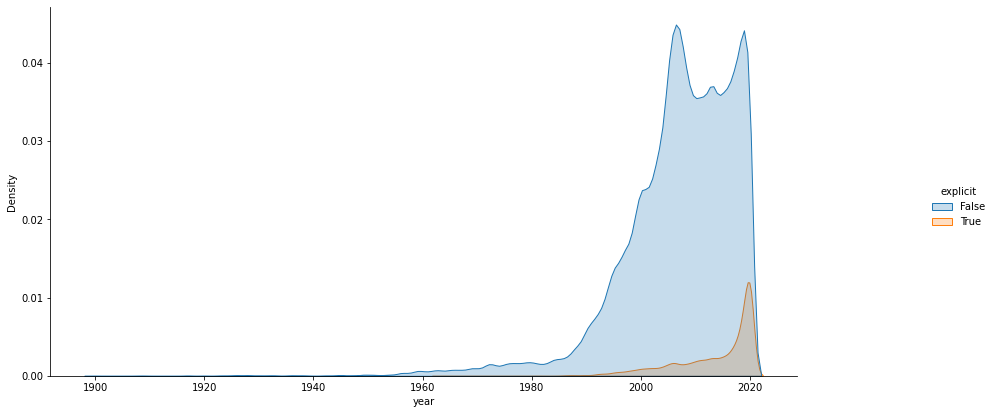

In [8]:
p = sns.displot(data, x="year", hue="explicit", kind="kde", fill=True)
plt.gcf().set_size_inches(15, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204015 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204015 non-null  object 
 1   name              1204015 non-null  object 
 2   album             1204015 non-null  object 
 3   album_id          1204015 non-null  object 
 4   artists           1204015 non-null  object 
 5   artist_ids        1204015 non-null  object 
 6   track_number      1204015 non-null  int64  
 7   disc_number       1204015 non-null  int64  
 8   explicit          1204015 non-null  bool   
 9   danceability      1204015 non-null  float64
 10  energy            1204015 non-null  float64
 11  key               1204015 non-null  int64  
 12  loudness          1204015 non-null  float64
 13  mode              1204015 non-null  int64  
 14  speechiness       1204015 non-null  float64
 15  acousticness      1204015 non-null  float64
 16  

In [10]:
data['artists'] = data['artists'].apply(lambda x: literal_eval(x))

data_exploded = data[["name", "artists"]].explode('artists')
print(data_exploded[data_exploded["name"]=='Miss Perfect (feat. Nodesha)'])

                             name       artists
243  Miss Perfect (feat. Nodesha)           ABS
243  Miss Perfect (feat. Nodesha)       Nodesha
243  Miss Perfect (feat. Nodesha)  Tom Elmhirst


In [11]:
df_vc = pd.DataFrame(data_exploded['artists'].value_counts())
df_vc = df_vc.rename_axis('artist_name').reset_index()
print(df_vc.head())

               artist_name  artists
0    Johann Sebastian Bach     9708
1     Ludwig van Beethoven     5768
2  Wolfgang Amadeus Mozart     3919
3   George Frideric Handel     3096
4          Antonio Vivaldi     2901


In [12]:
df_vc

,artist_name,artists
0,Johann Sebastian Bach,9708
1,Ludwig van Beethoven,5768
2,Wolfgang Amadeus Mozart,3919
3,George Frideric Handel,3096
4,Antonio Vivaldi,2901
...,...,...
137448,Michael Longoria,1
137449,Jill Paice,1
137450,Michael Clark,1
137451,RVBY,1


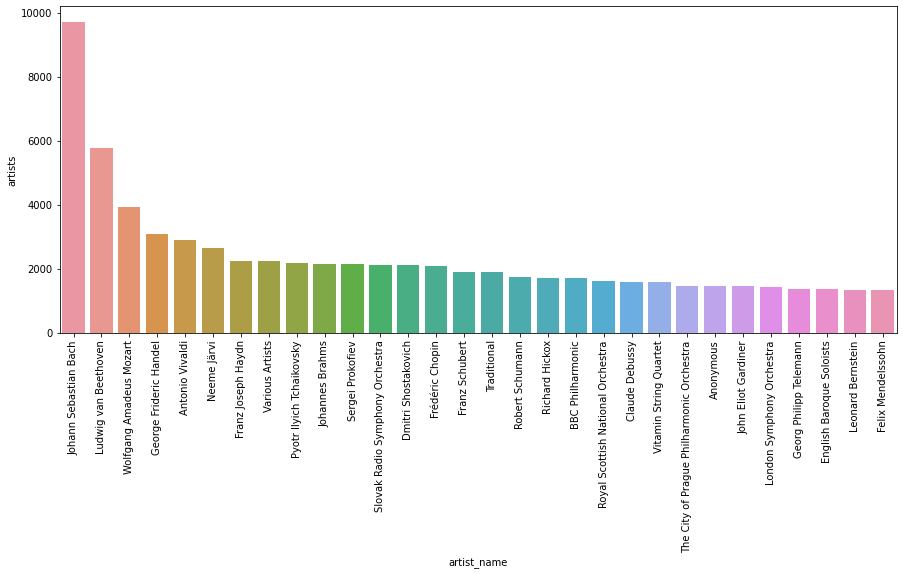

In [13]:
p = sns.barplot(data=df_vc.head(30), x="artist_name", y="artists")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 6)

In [14]:
# Same plot but with song from 2000 and above
data_exploded = data[data["year"]>=2000][["name", "artists"]].explode('artists')
df_vc = pd.DataFrame(data_exploded['artists'].value_counts())
df_vc = df_vc.rename_axis('artist_name').reset_index()
print(df_vc.head())

               artist_name  artists
0    Johann Sebastian Bach     7088
1     Ludwig van Beethoven     4179
2  Wolfgang Amadeus Mozart     2457
3          Antonio Vivaldi     1966
4   George Frideric Handel     1962


In [15]:
df_test = data[data["year"]>=2010].explode('artists')
df_test[df_test["artists"]=="Johann Sebastian Bach"].head(6)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
774,4yMhSpsOgcukcM2I2l7c6G,"Prelude in D Major, BWV 532",30th Anniversary Sampler,21msiWHKMZJ05rIkVD5UEk,Johann Sebastian Bach,"['5aIqB5nVVvmFsvSdExz408', '3akjbB0gWBVeUSoEzY...",11,1,False,0.0686,0.1660,2,-18.911,1,0.0352,0.0276,0.8020,0.4690,0.0568,75.357,270880,4.0,2015,2015-04-01
4999,5AR5rRqno6tSzqXYgdOPIt,Sonata No. 1 in G minor: I. Adagio,"Linn Super Audio Collection, Vol. 5",6LiHXVdAwDpVAq2AqF7RBR,Johann Sebastian Bach,"['5aIqB5nVVvmFsvSdExz408', '1JCdZfkNTbYWKF4Vx1...",9,1,False,0.2630,0.0414,6,-21.693,0,0.0450,0.9900,0.0539,0.2060,0.1920,113.903,248493,3.0,2011,2011-08-08
5000,4FZpDsq66Ir4U21e5Wag1h,"Mass in B Minor, BWV 232: I. Kyrie eleison","Linn Super Audio Collection, Vol. 5",6LiHXVdAwDpVAq2AqF7RBR,Johann Sebastian Bach,"['5aIqB5nVVvmFsvSdExz408', '59U4fdjDvEG4CZhSIZ...",10,1,False,0.1800,0.2160,10,-15.003,0,0.0383,0.9620,0.6770,0.3380,0.1190,110.377,581707,4.0,2011,2011-08-08
5006,0gICYfsPnnt3Ad290QwSo0,"Ascension Oratorio, BWV 11: Chorus Loben Gott ...","Linn Super Audio Collection, Vol. 5",6LiHXVdAwDpVAq2AqF7RBR,Johann Sebastian Bach,"['5aIqB5nVVvmFsvSdExz408', '1ziwbndebXGvW4z9CD...",16,1,False,0.5100,0.3430,1,-14.447,1,0.0280,0.9760,0.4780,0.0421,0.5460,98.318,272120,4.0,2011,2011-08-08
6544,4DNyrKfcH1IiKPAvKTSNyF,"Overture (Suite) No. 2 in B Minor, BWV 1067: V...",My First Classical Music Album,2l99EYx8kYMrT3nN9KB9ms,Johann Sebastian Bach,"['5aIqB5nVVvmFsvSdExz408', '16WKM2I7sY0uccRe5t...",6,1,False,0.5150,0.2690,11,-21.859,0,0.0370,0.8470,0.0897,0.0757,0.9640,130.998,90107,4.0,2011,2011-11-01
6752,6rARsDB6IaILaJIw71mou5,"Suite No. 1 in G Major, BWV. 1007: III. Courante","The Super Audio Collection, Vol. 6",0THIWjmxSAqrsaw9x1Jna6,Johann Sebastian Bach,"['5aIqB5nVVvmFsvSdExz408', '0rk5Wt6ahGAxWnHw3y...",9,1,False,0.3820,0.1750,6,-22.456,1,0.0502,0.8450,0.8850,0.1790,0.5070,102.072,166413,3.0,2012,2012-09-17


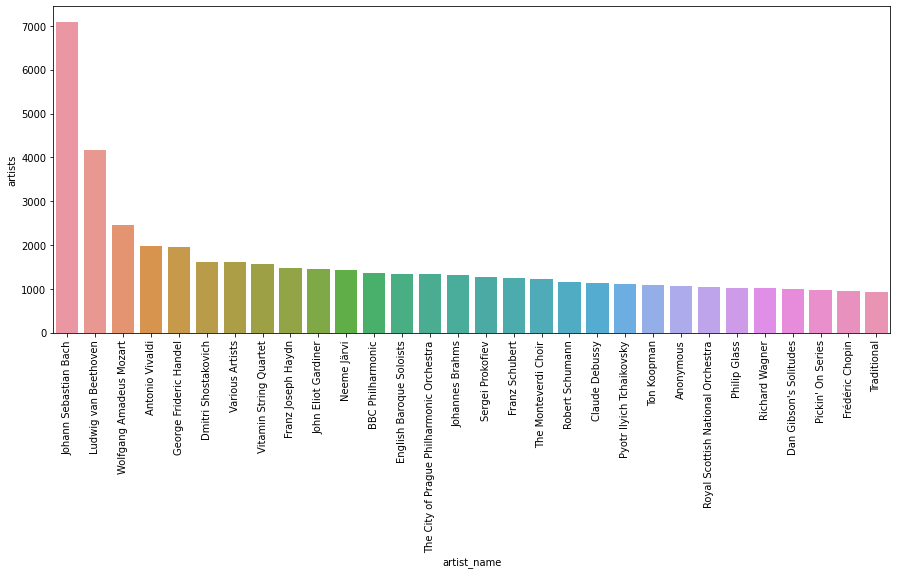

In [16]:
p = sns.barplot(data=df_vc.head(30), x="artist_name", y="artists")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 6)